# Advanced optimization - Homework 2

## 1. Dataset introduction

## 2. Setup

### 2.0 Install libraries

In [31]:
# !pip install numpy
# !pip install pandas
# !pip install xlrd
# !pip install openpyxl
# !pip install seaborn

### 2.1 Import libaries

In [32]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.linear_model import SGDClassifier

### 2.2 Setup parameters

In [33]:
# FEATURES
# employee_number
# age                   : numerical
# department            : no oder categorical
# education             : order categorical
# school                : no oder categorical
# education_field       : no oder categorical
# gender                : no oder categorical
# job_level             : oder categorical
# job_title             : no oder categorical
# job_role              : no oder categorical
# job_category          : no oder categorical
# marital_status        : no oder categorical
# performance_rating    : order categorical
# years_at_company      : numerical

# OUTPUT
# attrition             : binary output

In [34]:
DATASET_FILE_NAME = "2k_hr_dataset.xlsx"

NUMERICAL_FEATURES = ["age", "years_at_company"]
ORDER_CATEGORICAL_FEATURES = ["education", "job_level", "performance_rating"]
NO_ORDER_CATEGORICAL_FEATURES = ["department", "school", "education_field", "gender", "job_title", "job_role", "job_category", "marital_status"]
OUTPUT_NAME = ["attrition"]

In [35]:
total_number_of_features = len(NUMERICAL_FEATURES) + len(ORDER_CATEGORICAL_FEATURES) + len(NO_ORDER_CATEGORICAL_FEATURES) + len(OUTPUT_NAME)
print("Total number of features: ", total_number_of_features)

Total number of features:  14


### 2.3 Import dataset

In [36]:
df = pd.read_excel(DATASET_FILE_NAME)

In [37]:
df

,EmployeeNumber,Age,Attrition,Department,Education,school,EducationField,Gender,JobLevel,job_title,JobRole,jobCategory,MaritalStatus,PerformanceRating,YearsAtCompany
0,3664ef197b4cc53f7b52,41,No,FDN,3,NaN,Công nghệ,Male,4,Software Project Manager 3,Software Project Management,PM,Married,3,1.898630
1,6452222a2231db16c2dc,41,No,FHM,3,NaN,Công nghệ,Male,4,Business Analyst,Software Development,BA,Married,3,0.438356
2,9f52e751f00d4200a0c3,43,No,FHO FWA,3,NaN,Công nghệ,Male,2,Software Project Manager,Software Development,PM,Single,3,11.841096
3,43b0013b96ac5bbb2a8a,40,No,GHC,1,NaN,Công nghệ,Male,4,Software Project Manager 3,Software Project Management,PM,Married,3,0.043836
4,45785a6c8f7c132ba407,42,No,FHM,3,NaN,Công nghệ,Male,2,Developer 3,Software Development,Engineer,Married,3,0.276712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,710fc789ff41dda09a3f,27,Yes,FHN,3,NaN,Kỹ thuật,Male,3,Developer,Software Development,Engineer,Single,4,2.567123
1996,adfc059159cbaf7c7108,26,Yes,FHO FWA,1,NaN,Công nghệ,Male,2,Developer,Software Development,Engineer,Single,3,2.567123
1997,777af3d0daf3445d3ec2,29,Yes,IVS,3,NaN,Kinh tế,Female,3,Tester,Software Development,Tester,Married,3,2.567123
1998,9016f1c8bb235b1bfcf3,28,Yes,FHM,2,Đại học FPT HCM,Công nghệ,Male,3,DevOps Engineer,Software Development,Engineer,Single,4,2.567123


### 2.4 Overview of dataset

In [38]:
def camel_to_snake(name):
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

def standardize_column_names(column_list):
    return [camel_to_snake(col) for col in column_list]

standardize_column_names(df.columns)

['employee_number',
 'age',
 'attrition',
 'department',
 'education',
 'school',
 'education_field',
 'gender',
 'job_level',
 'job_title',
 'job_role',
 'job_category',
 'marital_status',
 'performance_rating',
 'years_at_company']

In [39]:
df.columns = standardize_column_names(df.columns)

In [40]:
df.columns

Index(['employee_number', 'age', 'attrition', 'department', 'education',
       'school', 'education_field', 'gender', 'job_level', 'job_title',
       'job_role', 'job_category', 'marital_status', 'performance_rating',
       'years_at_company'],
      dtype='object')

<Axes: >

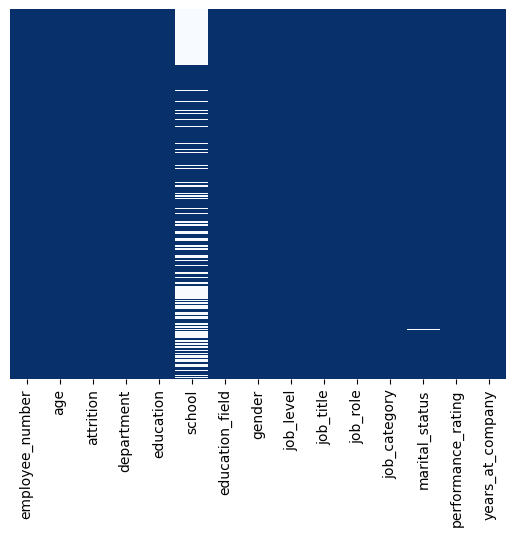

In [41]:
sns.heatmap(df.isnull(), cmap="Blues_r", cbar=False, yticklabels=False)

### 2.5 age

In [42]:
df["age"].describe()

count    2000.000000
mean       30.234500
std         4.901788
min        21.000000
25%        26.000000
50%        29.000000
75%        33.000000
max        62.000000
Name: age, dtype: float64

### 2.6 department

In [43]:
df["department"].describe()

count     1999
unique      50
top         FI
freq       274
Name: department, dtype: object

### 2.7 education

In [44]:
df["education"].describe()

count    2000.000000
mean        2.741000
std         0.677605
min         1.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: education, dtype: float64

## 3. Data cleaning

### 3.1 Data cleaning

In [45]:
# One hot encoding
cleaned_df = pd.get_dummies(df, columns=NO_ORDER_CATEGORICAL_FEATURES)

# Remove "employee_number"
cleaned_df = cleaned_df.iloc[:,1:]

# Convert all boolean to integer
for col in cleaned_df.columns:
    if cleaned_df[col].dtype == np.bool_:
        cleaned_df[col] = cleaned_df[col].astype(int)

# Convert output
cleaned_df['attrition'] = cleaned_df['attrition'].map({"Yes": 0, "No": 1})

# Move output column to the last position
attrition_column = cleaned_df.pop('attrition')
cleaned_df = pd.concat([cleaned_df, attrition_column], axis=1)

cleaned_df

,age,education,job_level,performance_rating,years_at_company,department_AIC,department_CEP,department_DES,department_DXG,department_EBS,...,job_category_Others,job_category_PM,job_category_Product Engineering,job_category_QA,job_category_Tester,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown,attrition
0,41,3,4,3,1.898630,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
1,41,3,4,3,0.438356,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,43,3,2,3,11.841096,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
3,40,1,4,3,0.043836,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
4,42,3,2,3,0.276712,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,27,3,3,4,2.567123,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1996,26,1,2,3,2.567123,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1997,29,3,3,3,2.567123,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1998,28,2,3,4,2.567123,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### 3.2 Data standardization

In [46]:
print("hello")

hello


### 3.3 Summary X and y

In [47]:
X = cleaned_df.iloc[:,:-1]

In [48]:
X

,age,education,job_level,performance_rating,years_at_company,department_AIC,department_CEP,department_DES,department_DXG,department_EBS,...,job_category_Manager,job_category_Others,job_category_PM,job_category_Product Engineering,job_category_QA,job_category_Tester,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown
0,41,3,4,3,1.898630,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,41,3,4,3,0.438356,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,43,3,2,3,11.841096,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,40,1,4,3,0.043836,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,42,3,2,3,0.276712,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,27,3,3,4,2.567123,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1996,26,1,2,3,2.567123,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1997,29,3,3,3,2.567123,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1998,28,2,3,4,2.567123,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [49]:
y = cleaned_df.iloc[:,-1]

In [50]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: attrition, Length: 2000, dtype: int64

## 4. Build the models

### Requirements
- Neccessary features
- Best link functions

### 4.1. The simplest model

In [52]:
# y = f(w^Tx)

# f(s) = 1 / (1 + e^-s)     (logit link function)

In [53]:
def logit(s):
    return 1 / (1 + np.e ^ -s)

## 5. Algorithms optimization

### 5.1. Loss function selection

In [54]:
def loss():
    pass

### 5.2. Gradient descent

## 6. Algorithms comparison

### 6.1. SKLEARN: SGDClassifier | log_loss

Loss value: 0.087686


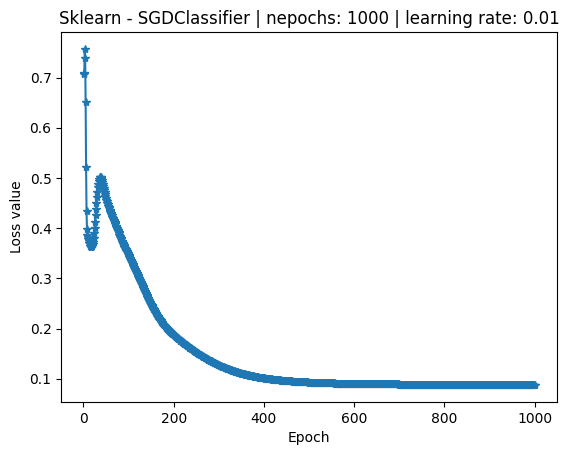

In [89]:
NUMBER_OF_EPOCHS = 1000
INITIAL_LEARNING_RATE = 0.01

sklearn_SGDClassifier_model = SGDClassifier(
    loss="log_loss",
    learning_rate="constant",
    eta0=INITIAL_LEARNING_RATE,
    max_iter=1,
    tol=None,
    random_state=42,
    warm_start=True,
)

log_loss_values = []

for epoch in range(1, NUMBER_OF_EPOCHS + 1):  # Train for NUMBER_OF_EPOCHS epochs
    sklearn_SGDClassifier_model.fit(X, y)
    y_prob = sklearn_SGDClassifier_model.predict_proba(X)
    loss = log_loss(y, y_prob)
    log_loss_values.append(loss)
    
# Print solution
print(f"Loss value: {log_loss_values[-1]:.6f}")

# Plot the loss curve
plt.plot(range(1, NUMBER_OF_EPOCHS + 1), log_loss_values, marker="*")
plt.xlabel("Epoch")
plt.ylabel("Loss value")
plt.title(f"Sklearn - SGDClassifier | nepochs: {NUMBER_OF_EPOCHS} | learning rate: {INITIAL_LEARNING_RATE}")
plt.show()

In [ ]:
### 6.2. 

## 7. Conclusion